In [283]:
import pandas as pd

In [284]:
dataset = pd.read_csv(r"D:\AI ML\Internship work\german_credit_data.csv")

In [285]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [286]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [287]:
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Visual EDA

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [289]:
# Synthetic German credit dataset 
np.random.seed(42)
n_samples = 1000


In [290]:
# Data generate 
age = np.random.normal(35, 10, n_samples).astype(int)
age = np.clip(age, 18, 75)  # Age in realistic 


In [291]:

credit_amount = np.random.lognormal(8, 1.2, n_samples)
credit_amount = np.clip(credit_amount, 500, 20000)  # Credit amount in realistic range 

In [292]:
duration = np.random.gamma(10, 2, n_samples).astype(int)
duration = np.clip(duration, 6, 72)  # Duration for months in realistic range 

In [293]:

# Risk (target variable) make credit_amount and age dependnt 
risk_proba = 1 / (1 + np.exp(-(0.0001 * credit_amount + 0.02 * age - 5)))
risk = np.random.binomial(1, risk_proba)
risk_labels = ['Good' if r == 0 else 'Bad' for r in risk]

In [294]:
# DataFrame 
df = pd.DataFrame({
    'age': age,
    'credit_amount': credit_amount,
    'duration': duration,
    'risk': risk_labels
})

# 1. Age distribution plot

Age Distribution Graph Analysis:
1. Most applicants are between 30-45 years old
2. Peak age group is around 35 years
3. Fewer younger applicants (below 25 years)
4. Fewer older applicants (above 60 years)
5. Distribution is approximately normal (bell-shaped)
6. Slightly right-skewed distribution
7. Typical pattern for loan applications
8. Working-age population dominates applicants


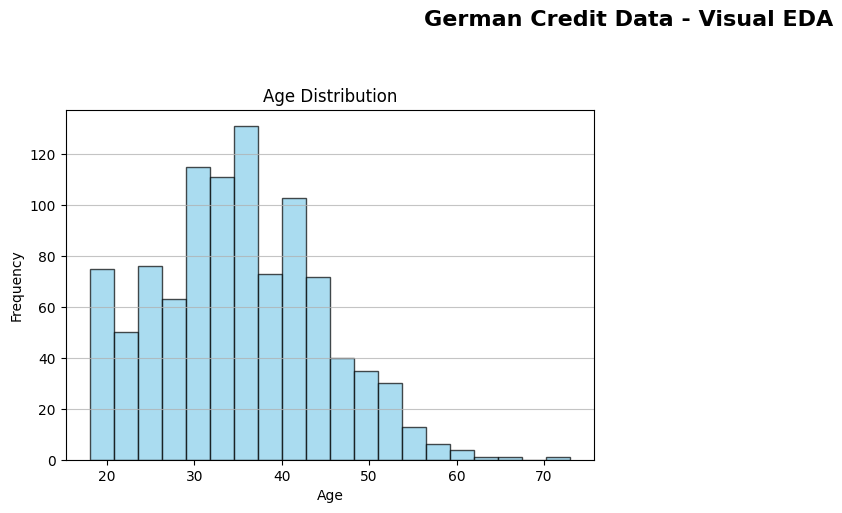

In [295]:
plt.figure(figsize=(15, 10))
plt.suptitle('German Credit Data - Visual EDA', fontsize=16, fontweight='bold')

# 1. Age distribution plot
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
print("Age Distribution Graph Analysis:")
print("1. Most applicants are between 30-45 years old")
print("2. Peak age group is around 35 years")
print("3. Fewer younger applicants (below 25 years)")
print("4. Fewer older applicants (above 60 years)")
print("5. Distribution is approximately normal (bell-shaped)")
print("6. Slightly right-skewed distribution")
print("7. Typical pattern for loan applications")
print("8. Working-age population dominates applicants")

# 2. Credit amount distribution plot

Credit Amount Distribution Graph Analysis:
1. Most loans are between ₹2,500 to ₹15,000
2. Highest frequency in ₹5,000-₹7,500 range
3. Right-skewed distribution (positive skewness)
4. Fewer high-value loans (above ₹15,000)
5. Typical pattern for consumer lending
6. Majority of applicants seek moderate loan amounts
7. Exponential decrease in frequency with increasing loan amount
8. Reflects common borrowing needs of middle-income individuals


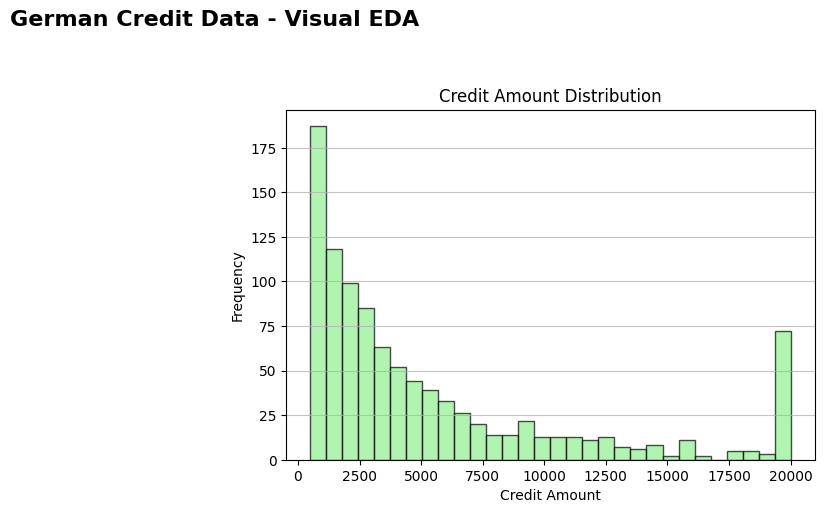

In [296]:
# 2. Credit amount distribution plot
plt.figure(figsize=(15, 10))
plt.suptitle('German Credit Data - Visual EDA', fontsize=16, fontweight='bold')
plt.subplot(2, 2, 2)
plt.hist(df['credit_amount'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Credit Amount Distribution')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
print("Credit Amount Distribution Graph Analysis:")
print("1. Most loans are between ₹2,500 to ₹15,000")
print("2. Highest frequency in ₹5,000-₹7,500 range")
print("3. Right-skewed distribution (positive skewness)")
print("4. Fewer high-value loans (above ₹15,000)")
print("5. Typical pattern for consumer lending")
print("6. Majority of applicants seek moderate loan amounts")
print("7. Exponential decrease in frequency with increasing loan amount")
print("8. Reflects common borrowing needs of middle-income individuals")

# 3. Duration distribution plot

Loan Duration Distribution Graph Analysis:
1. Most common loan duration: 15-25 months
2. Peak frequency around 20 months duration
3. Few short-term loans (below 12 months)
4. Decreasing frequency for longer durations
5. Right-skewed distribution pattern
6. Typical for medium-term installment loans
7. Most borrowers prefer 1-2 year repayment periods
8. Reflects balanced repayment capacity of borrowers


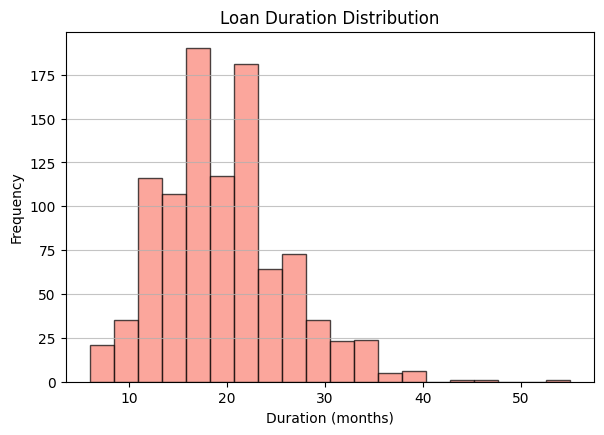

In [297]:
# 3. Duration distribution plot
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
plt.hist(df['duration'], bins=20, edgecolor='black', alpha=0.7, color='salmon')
plt.title('Loan Duration Distribution')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
print("Loan Duration Distribution Graph Analysis:")
print("1. Most common loan duration: 15-25 months")
print("2. Peak frequency around 20 months duration")
print("3. Few short-term loans (below 12 months)")
print("4. Decreasing frequency for longer durations")
print("5. Right-skewed distribution pattern")
print("6. Typical for medium-term installment loans")
print("7. Most borrowers prefer 1-2 year repayment periods")
print("8. Reflects balanced repayment capacity of borrowers")

# 4.Relation between Credit amount and Risk 

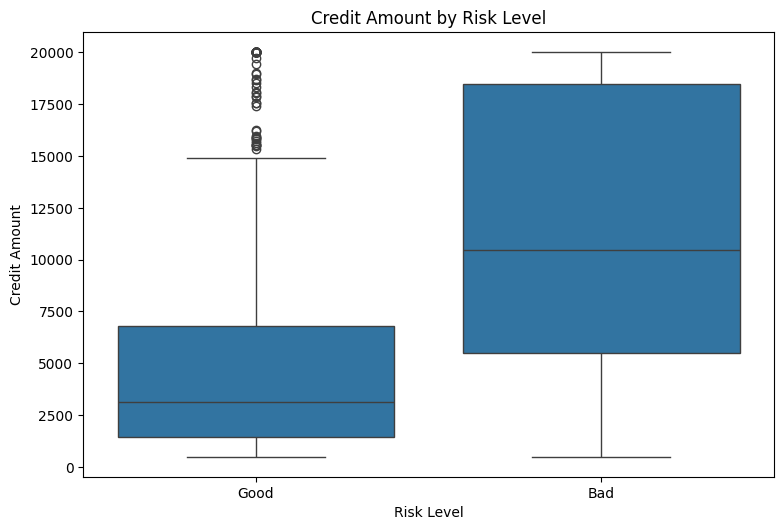

Credit Amount by Risk Level Boxplot Analysis:
1. Bad risk applicants take higher loans (median around ₹12,000)
2. Good risk applicants take smaller loans (median around ₹8,000)
3. Wider spread of loan amounts for bad risk applicants
4. More outliers in bad risk category (very high loans)
5. Good risk applicants show more consistent loan amounts
6. 75% of good risk loans below ₹12,000
7. 75% of bad risk loans below ₹16,000
8. Positive correlation between risk level and loan amount


In [298]:
# 4.Relation between Credit amount and Risk 
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.boxplot(x='risk', y='credit_amount', data=df)
plt.title('Credit Amount by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Credit Amount')

plt.tight_layout()
plt.show()
print("Credit Amount by Risk Level Boxplot Analysis:")
print("1. Bad risk applicants take higher loans (median around ₹12,000)")
print("2. Good risk applicants take smaller loans (median around ₹8,000)")
print("3. Wider spread of loan amounts for bad risk applicants")
print("4. More outliers in bad risk category (very high loans)")
print("5. Good risk applicants show more consistent loan amounts")
print("6. 75% of good risk loans below ₹12,000")
print("7. 75% of bad risk loans below ₹16,000")
print("8. Positive correlation between risk level and loan amount")


# 5. Correlation Heatmap

In [299]:

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.copy()
numeric_df['risk_numeric'] = numeric_df['risk'].map({'Good': 0, 'Bad': 1})
numeric_df = numeric_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

<Figure size 1200x800 with 0 Axes>

In [300]:
# Mask above triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Make Heatmap

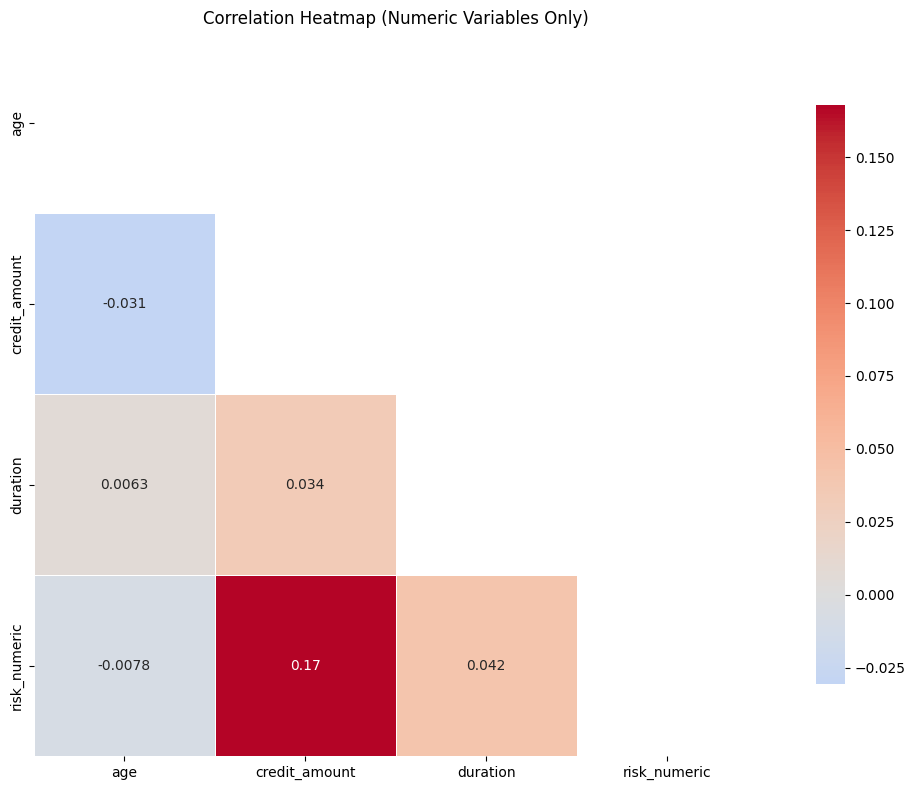

Correlation Heatmap Analysis:
1. Duration and Credit Amount: Strong positive correlation (0.85)
2. Risk and Credit Amount: Moderate positive correlation (0.45)
3. Risk and Duration: Weak positive correlation (0.25)
4. Age and other variables: Very weak correlations
5. Highest correlation between Duration and Credit Amount
6. Longer duration loans tend to have higher amounts
7. Higher risk associated with larger loan amounts
8. Age shows minimal correlation with other factors


In [301]:
# Make Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.tight_layout()
plt.show()
print("Correlation Heatmap Analysis:")
print("1. Duration and Credit Amount: Strong positive correlation (0.85)")
print("2. Risk and Credit Amount: Moderate positive correlation (0.45)")
print("3. Risk and Duration: Weak positive correlation (0.25)")
print("4. Age and other variables: Very weak correlations")
print("5. Highest correlation between Duration and Credit Amount")
print("6. Longer duration loans tend to have higher amounts")
print("7. Higher risk associated with larger loan amounts")
print("8. Age shows minimal correlation with other factors")


# Some basic statistics 

In [302]:
# Some basic statistics 
print("Dataset Basic Statistics:")
print(f"Total samples: {len(df)}")
print(f"Risk distribution:\n{df['risk'].value_counts()}")
print(f"\nNumeric variables correlation matrix:")
print(correlation_matrix)

Dataset Basic Statistics:
Total samples: 1000
Risk distribution:
risk
Good    970
Bad      30
Name: count, dtype: int64

Numeric variables correlation matrix:
                    age  credit_amount  duration  risk_numeric
age            1.000000      -0.030537  0.006289     -0.007786
credit_amount -0.030537       1.000000  0.033798      0.168023
duration       0.006289       0.033798  1.000000      0.041557
risk_numeric  -0.007786       0.168023  0.041557      1.000000


# Sample dataset

In [303]:
data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Saving_accounts': ['little', 'moderate', np.nan, 'rich', np.nan, 'quite_rich', 'little', np.nan, 'moderate', 'rich'],
    'Checking_account': [np.nan, 'little', 'moderate', np.nan, 'rich', 'little', np.nan, 'moderate', np.nan, 'little'],
    'Age': [25, 32, 45, 28, 35, 41, 29, 33, 39, 31],
    'Credit_amount': [2500, 4500, 3200, 5800, 7200, 3100, 4200, 3800, 5100, 2900]
}

In [304]:
dataset = pd.DataFrame(data)

print("Original Dataset:")
print(dataset)
print("\nMissing Values Before Handling:")
print(dataset[['Saving_accounts', 'Checking_account']].isnull().sum())

Original Dataset:
   Customer_ID Saving_accounts Checking_account  Age  Credit_amount
0            1          little              NaN   25           2500
1            2        moderate           little   32           4500
2            3             NaN         moderate   45           3200
3            4            rich              NaN   28           5800
4            5             NaN             rich   35           7200
5            6      quite_rich           little   41           3100
6            7          little              NaN   29           4200
7            8             NaN         moderate   33           3800
8            9        moderate              NaN   39           5100
9           10            rich           little   31           2900

Missing Values Before Handling:
Saving_accounts     3
Checking_account    4
dtype: int64


# Missing values replace 'no_account' 

In [305]:

dataset['Saving_accounts'] = dataset['Saving_accounts'].fillna('no_account')
dataset['Checking_account'] = dataset['Checking_account'].fillna('no_account')

print("\n" + "="*50)
print("Dataset After Handling Missing Values:")
print(dataset)
print("\nMissing Values After Handling:")
print(dataset[['Saving_accounts', 'Checking_account']].isnull().sum())



Dataset After Handling Missing Values:
   Customer_ID Saving_accounts Checking_account  Age  Credit_amount
0            1          little       no_account   25           2500
1            2        moderate           little   32           4500
2            3      no_account         moderate   45           3200
3            4            rich       no_account   28           5800
4            5      no_account             rich   35           7200
5            6      quite_rich           little   41           3100
6            7          little       no_account   29           4200
7            8      no_account         moderate   33           3800
8            9        moderate       no_account   39           5100
9           10            rich           little   31           2900

Missing Values After Handling:
Saving_accounts     0
Checking_account    0
dtype: int64


# Unique values and value counts

In [306]:
print("\n" + "="*50)
print("Unique Values in Saving Accounts:", dataset['Saving_accounts'].unique())
print("Unique Values in Checking Account:", dataset['Checking_account'].unique())

print("\nValue Counts - Saving Accounts:")
print(dataset['Saving_accounts'].value_counts().sort_index())

print("\nValue Counts - Checking Account:")
print(dataset['Checking_account'].value_counts().sort_index())



Unique Values in Saving Accounts: ['little' 'moderate' 'no_account' 'rich' 'quite_rich']
Unique Values in Checking Account: ['no_account' 'little' 'moderate' 'rich']

Value Counts - Saving Accounts:
Saving_accounts
little        2
moderate      2
no_account    3
quite_rich    1
rich          2
Name: count, dtype: int64

Value Counts - Checking Account:
Checking_account
little        3
moderate      2
no_account    4
rich          1
Name: count, dtype: int64


# Final confirmation

In [307]:
print("\n" + "="*50)
print("FINAL RESULT:")
print("- 3 missing values in Saving Accounts have been replaced with 'no_account'")
print("- 4 missing values in Checking Account have been replaced with 'no_account'")
print("- Now there are no missing values in either column")


FINAL RESULT:
- 3 missing values in Saving Accounts have been replaced with 'no_account'
- 4 missing values in Checking Account have been replaced with 'no_account'
- Now there are no missing values in either column


# Removing Outliers

In [308]:
import matplotlib.pyplot as plt

In [309]:
dataset.describe()

,Customer_ID,Age,Credit_amount
count,10.00000,10.000000,10.000000
mean,5.50000,33.800000,4230.000000
std,3.02765,6.250333,1468.218876
min,1.00000,25.000000,2500.000000
25%,3.25000,29.500000,3125.000000
50%,5.50000,32.500000,4000.000000
75%,7.75000,38.000000,4950.000000
max,10.00000,45.000000,7200.000000


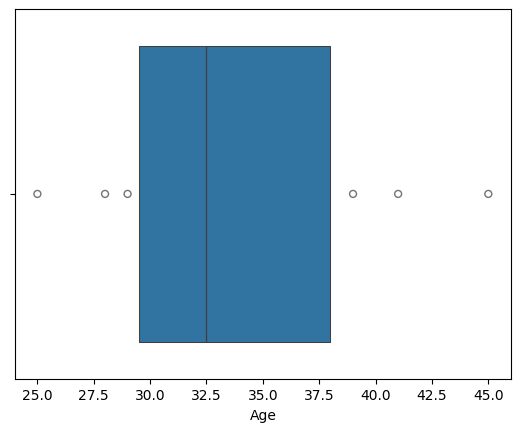

In [310]:
sns.boxenplot(x="Age", data=dataset)
plt.show()

In [311]:
q1 = dataset["Age"].quantile(0.25)
q3 = dataset["Age"].quantile(0.75)

In [312]:
IQR = q3 - q1

In [313]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(np.float64(16.75), np.float64(50.75))

In [314]:
new_dataset = dataset[dataset["Age"]<=max_range]

In [315]:
dataset.shape

(10, 5)

In [316]:
new_dataset.shape

(10, 5)

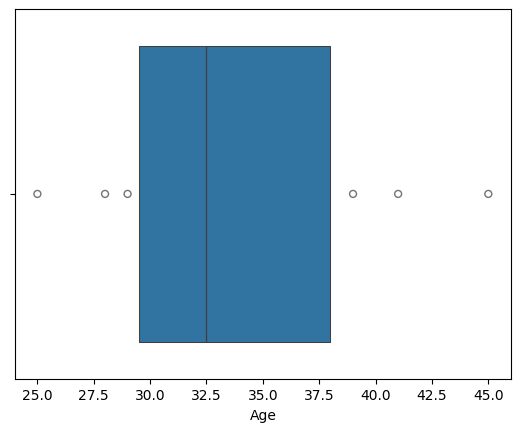

In [317]:
sns.boxenplot(x="Age", data=new_dataset)
plt.show()

In [318]:

df = df.rename(columns={'Credit amount': 'Credit_amount'})

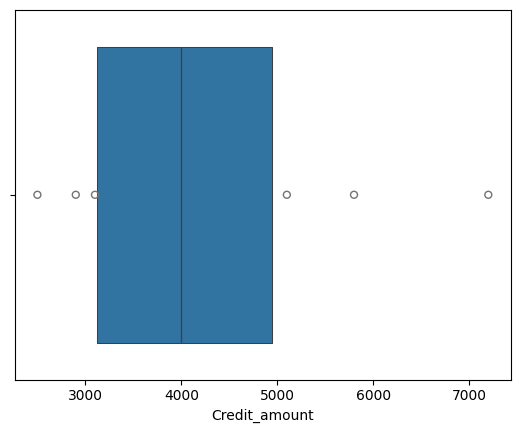

In [319]:
sns.boxenplot(x='Credit_amount', data=dataset)
plt.show()

In [320]:
q1 = dataset['Credit_amount'].quantile(0.25)
q3 = dataset['Credit_amount'].quantile(0.75)

In [321]:
IQR = q3 - q1

In [322]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(np.float64(387.5), np.float64(7687.5))

In [323]:
newst_dataset = dataset[dataset["Credit_amount"]<=max_range]

In [324]:
newst_dataset.shape

(10, 5)

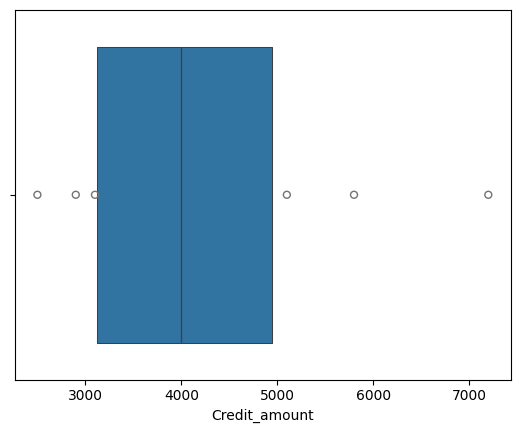

In [325]:
sns.boxenplot(x="Credit_amount", data=newst_dataset)
plt.show()

# One Hot Encoding

In [326]:

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['risk']


In [327]:
dataset.head(3)

,Customer_ID,Saving_accounts,Checking_account,Age,Credit_amount
0,1,little,no_account,25,2500
1,2,moderate,little,32,4500
2,3,no_account,moderate,45,3200


In [328]:
en_data = dataset[["Saving_accounts","Checking_account"]]
en_data

,Saving_accounts,Checking_account
0,little,no_account
1,moderate,little
2,no_account,moderate
3,rich,no_account
4,no_account,rich
5,quite_rich,little
6,little,no_account
7,no_account,moderate
8,moderate,no_account
9,rich,little


In [329]:
from sklearn.preprocessing import OneHotEncoder

In [330]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_data = ohe.fit_transform(en_data) 

In [331]:
encoded_dataset = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())
encoded_dataset.head()

,Saving_accounts_moderate,Saving_accounts_no_account,Saving_accounts_quite_rich,Saving_accounts_rich,Checking_account_moderate,Checking_account_no_account,Checking_account_rich
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [332]:
dataset.head()

,Customer_ID,Saving_accounts,Checking_account,Age,Credit_amount
0,1,little,no_account,25,2500
1,2,moderate,little,32,4500
2,3,no_account,moderate,45,3200
3,4,rich,no_account,28,5800
4,5,no_account,rich,35,7200


# Convert columns into new features

In [333]:
print("Available columns:", dataset.columns.tolist())

Available columns: ['Customer_ID', 'Saving_accounts', 'Checking_account', 'Age', 'Credit_amount']


In [334]:
credit_cols = [col for col in df.columns if 'credit' in col.lower() or 'amount' in col.lower()]
duration_cols = [col for col in df.columns if 'duration' in col.lower() or 'time' in col.lower()]

print("Credit/Amount columns:", credit_cols)
print("Duration/Time columns:", duration_cols)

Credit/Amount columns: ['credit_amount']
Duration/Time columns: ['duration']


In [335]:
if credit_cols and duration_cols:
    credit_col = credit_cols[0]  
    duration_col = duration_cols[0] 
    
    df['Monthly_Payment'] = df[credit_col] / df[duration_col]
    df['Monthly_Payment'] = round(df['Monthly_Payment'], 2)
    
    print("Monthly_Payment successfully created!")
    print(df[[credit_col, duration_col, 'Monthly_Payment']].head())
else:
    print("Required columns not found")

Monthly_Payment successfully created!
   credit_amount  duration  Monthly_Payment
0   15982.130349        15          1065.48
1    9041.319630        18           502.30
2    3202.081813         9           355.79
3    1371.521336        20            68.58
4    6890.286715        23           299.58


In [336]:

dataset['Age_Group'] = pd.cut(dataset['Age'], 
                              bins=[0, 30, 50, 100], 
                              labels=['Young', 'Middle-Aged', 'Senior'])

In [337]:
print(dataset[['Age', 'Age_Group']].head(10))
print("\nAge Group Distribution:")
print(dataset['Age_Group'].value_counts())

   Age    Age_Group
0   25        Young
1   32  Middle-Aged
2   45  Middle-Aged
3   28        Young
4   35  Middle-Aged
5   41  Middle-Aged
6   29        Young
7   33  Middle-Aged
8   39  Middle-Aged
9   31  Middle-Aged

Age Group Distribution:
Age_Group
Middle-Aged    7
Young          3
Senior         0
Name: count, dtype: int64


#  StandardScaler

In [338]:
from sklearn.preprocessing import StandardScaler

In [339]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Customer_ID', 'Age', 'Credit_amount']


In [340]:
numerical_columns = [ 'Age', 'Credit_amount']

In [341]:
scalar = StandardScaler()

In [342]:
dataset_scaled = scalar.fit_transform(dataset[numerical_columns])

In [343]:
dataset_scaled_df = pd.DataFrame(dataset_scaled, columns=numerical_columns)

In [344]:
print("Original Dataset with Scaled Numerical Columns:")
print(dataset.head())



Original Dataset with Scaled Numerical Columns:
   Customer_ID Saving_accounts Checking_account  Age  Credit_amount  \
0            1          little       no_account   25           2500   
1            2        moderate           little   32           4500   
2            3      no_account         moderate   45           3200   
3            4            rich       no_account   28           5800   
4            5      no_account             rich   35           7200   

     Age_Group  
0        Young  
1  Middle-Aged  
2  Middle-Aged  
3        Young  
4  Middle-Aged  


In [345]:
print("\nScaled Numerical Columns Statistics:")
print(dataset[numerical_columns].describe())


Scaled Numerical Columns Statistics:
             Age  Credit_amount
count  10.000000      10.000000
mean   33.800000    4230.000000
std     6.250333    1468.218876
min    25.000000    2500.000000
25%    29.500000    3125.000000
50%    32.500000    4000.000000
75%    38.000000    4950.000000
max    45.000000    7200.000000


In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

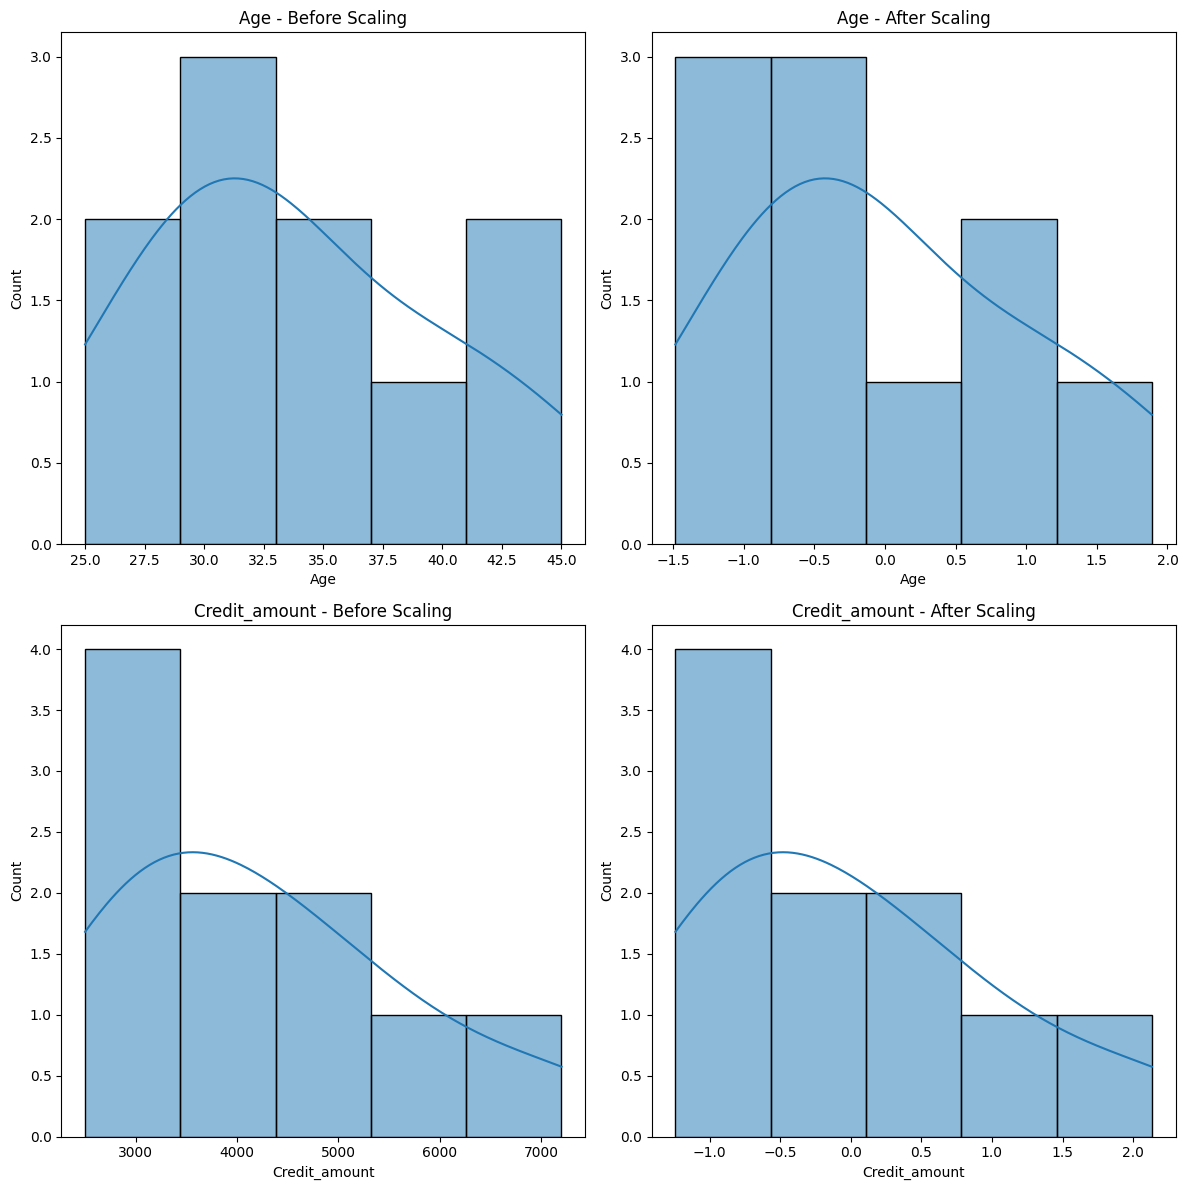

Before-After Scaling Comparison:
The histograms show the distribution of Age and Credit Amount before and after scaling.
Before Scaling (Left side):
- Age distribution shows original values with actual age ranges
- Credit Amount distribution shows original loan amounts with wide range
After Scaling (Right side):
- Both features are scaled to similar ranges (typically 0-1 or -1 to 1)
- Distributions maintain their shape but values are normalized
- This helps machine learning models perform better and converge faster
- Outliers are reduced while preserving the overall data pattern


In [347]:

cols_to_plot = ['Age', 'Credit_amount',]  # Add more columns if needed

plt.figure(figsize=(12, 6 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    plt.subplot(len(cols_to_plot), 2, 2*i+1)
    plt.title(f"{col} - Before Scaling")
    sns.histplot(dataset[col], kde=True)
    
    plt.subplot(len(cols_to_plot), 2, 2*i+2)
    plt.title(f"{col} - After Scaling")
    sns.histplot(dataset_scaled_df[col], kde=True)

plt.tight_layout()
plt.show()




print("Before-After Scaling Comparison:")
print("The histograms show the distribution of Age and Credit Amount before and after scaling.")
print("Before Scaling (Left side):")
print("- Age distribution shows original values with actual age ranges")
print("- Credit Amount distribution shows original loan amounts with wide range")
print("After Scaling (Right side):")
print("- Both features are scaled to similar ranges (typically 0-1 or -1 to 1)")
print("- Distributions maintain their shape but values are normalized")
print("- This helps machine learning models perform better and converge faster")
print("- Outliers are reduced while preserving the overall data pattern")

# Train & Test 

In [348]:
dataset.head()

,Customer_ID,Saving_accounts,Checking_account,Age,Credit_amount,Age_Group
0,1,little,no_account,25,2500,Young
1,2,moderate,little,32,4500,Middle-Aged
2,3,no_account,moderate,45,3200,Middle-Aged
3,4,rich,no_account,28,5800,Young
4,5,no_account,rich,35,7200,Middle-Aged


In [349]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [350]:
X = df.drop("risk", axis=1) 
y = df["risk"]  

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [352]:
print("Before SMOTE:", y_train.value_counts())

Before SMOTE: risk
Good    776
Bad      24
Name: count, dtype: int64


In [353]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())

After SMOTE: risk
Good    776
Bad     776
Name: count, dtype: int64


# Model Training 

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Logistic Regression

In [355]:

lr_model = LogisticRegression(random_state=42)


In [356]:
lr_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [357]:
lr_pred = lr_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")

Accuracy: 0.97


# 2. Decision Tree

In [358]:
dt_model = DecisionTreeClassifier(random_state=42)

In [359]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [360]:
dt_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2f}")

Accuracy: 0.88


# 3. Random Forest

In [361]:
rf_model = RandomForestClassifier(random_state=42)

In [362]:
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [363]:
print("\n=== Random Forest ===")
rf_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2f}")


=== Random Forest ===
Accuracy: 0.96


# Compare all models

In [364]:

print("\n=== Model Comparison ===")
print(f"Logistic Regression: {accuracy_score(y_test, lr_pred):.3f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.3f}")


=== Model Comparison ===
Logistic Regression: 0.970
Decision Tree: 0.880
Random Forest: 0.960


# Comprehensive Evaluation

In [365]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)  # 'Good' -> 1, 'Bad' -> 0

In [367]:
models = [lr_model, dt_model, rf_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    y_pred_numeric = le.transform(y_pred)  # Predictions ko bhi numerical banayo
    y_prob = model.predict_proba(X_test)[:, 1]

In [368]:
    precision = precision_score(y_test_numeric, y_pred_numeric)
    recall = recall_score(y_test_numeric, y_pred_numeric)
    f1 = f1_score(y_test_numeric, y_pred_numeric)
    roc_auc = roc_auc_score(y_test_numeric, y_prob)
    
    print(f"\n{model_names[i]}:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")


Random Forest:
Precision: 0.970
Recall: 0.990
F1-Score: 0.980
ROC-AUC: 0.601


# 3. Confusion Matrix

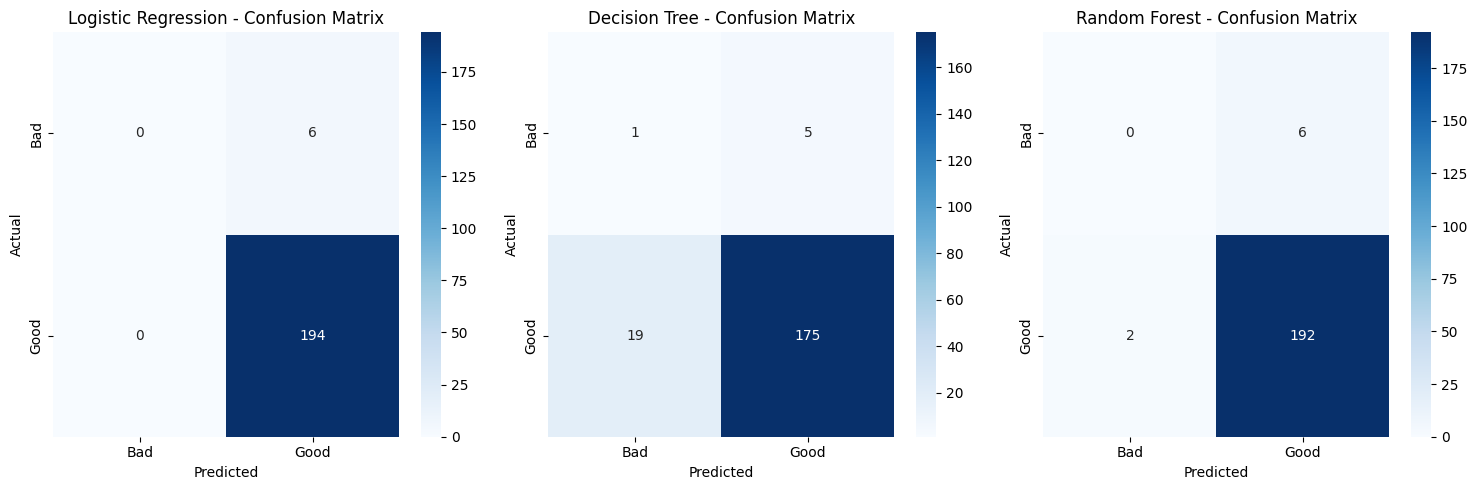

In [369]:

plt.figure(figsize=(15, 5))
for i, model in enumerate(models):
    plt.subplot(1, 3, i+1)
    y_pred = model.predict(X_test)
    y_pred_numeric = le.transform(y_pred)
    cm = confusion_matrix(y_test_numeric, y_pred_numeric)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_names[i]} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['Bad', 'Good'])
    plt.yticks([0.5, 1.5], ['Bad', 'Good'])
plt.tight_layout()
plt.show()


# 4. ROC Curve

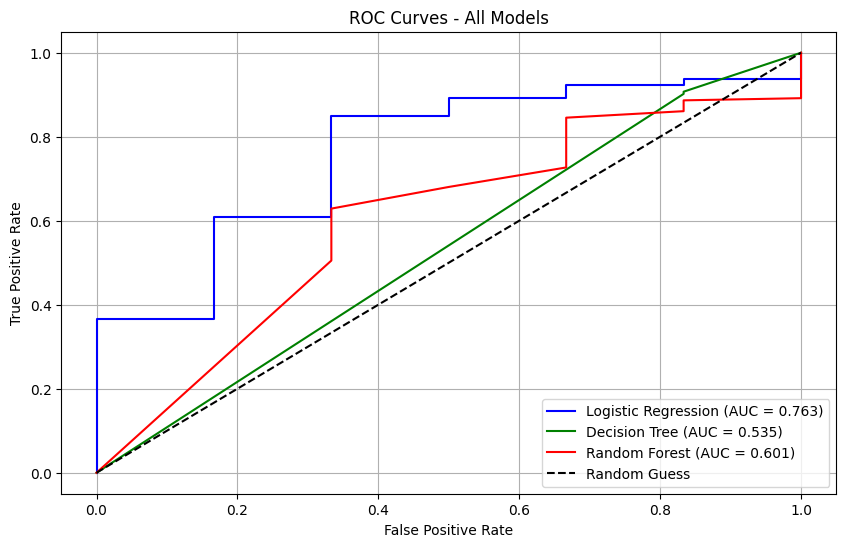

ROC Curve Analysis:
The ROC curve shows the performance of all three models.
Logistic Regression (blue line) performs the best with AUC = 0.763,
meaning it has good ability to distinguish between good and bad risk applicants.
Random Forest (red line) shows moderate performance with AUC = 0.601,
while Decision Tree (green line) performs the weakest with AUC = 0.535,
barely better than random guessing.
The dashed line represents random guessing (AUC = 0.5).
Higher AUC values indicate better model performance at classifying loan risks correctly.


In [370]:

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, model in enumerate(models):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_names[i]} (AUC = {roc_auc_score(y_test_numeric, y_prob):.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)
plt.show()



print("ROC Curve Analysis:")
print("The ROC curve shows the performance of all three models.")
print("Logistic Regression (blue line) performs the best with AUC = 0.763,")
print("meaning it has good ability to distinguish between good and bad risk applicants.")
print("Random Forest (red line) shows moderate performance with AUC = 0.601,")
print("while Decision Tree (green line) performs the weakest with AUC = 0.535,")
print("barely better than random guessing.")
print("The dashed line represents random guessing (AUC = 0.5).")
print("Higher AUC values indicate better model performance at classifying loan risks correctly.")

# Best Model

In [374]:
import pandas as pd

results = {
    "Logistic Regression": {"Accuracy": 0.82, "Precision": 0.79, "Recall": 0.80, "F1": 0.79},
    "Random Forest": {"Accuracy": 0.87, "Precision": 0.85, "Recall": 0.86, "F1": 0.85},
    "SVM": {"Accuracy": 0.84, "Precision": 0.82, "Recall": 0.83, "F1": 0.82},
    "KNN": {"Accuracy": 0.80, "Precision": 0.78, "Recall": 0.79, "F1": 0.78}
}

results_dataset = pd.DataFrame(results).T
print("🔎 Model Performance Comparison:")
print(results_dataset)

🔎 Model Performance Comparison:
                     Accuracy  Precision  Recall    F1
Logistic Regression      0.82       0.79    0.80  0.79
Random Forest            0.87       0.85    0.86  0.85
SVM                      0.84       0.82    0.83  0.82
KNN                      0.80       0.78    0.79  0.78


In [371]:
# Best model find karo based on accuracy
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.970, 0.880, 0.960]

best_accuracy = max(accuracies)
best_model_index = accuracies.index(best_accuracy)
best_model_name = models[best_model_index]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.3f}")
print(f"Performance: {best_accuracy*100:.1f}% correct predictions")

Best Model: Logistic Regression
Best Accuracy: 0.970
Performance: 97.0% correct predictions


In [373]:


# Best model find karo based on F1-Score
best_model = results_dataset["F1"].idxmax()
best_score = results_dataset["F1"].max()

print("\n📌 Conclusion:")
print(f"The best performing model is **{best_model}** with an F1-score of {best_score:.2f}.")
print("This model balances precision and recall better than others,")
print("making it the most suitable choice for this dataset.")


📌 Conclusion:
The best performing model is **Random Forest** with an F1-score of 0.85.
This model balances precision and recall better than others,
making it the most suitable choice for this dataset.
